## 题目2 
使用R对内置longley数据集进行回归分析，如果以GNP.deflator作为因变量y，问这个数据集是否存在多重共线性问题？应该选择哪些变量参与回归？

> Longley数据集来自J．W．Longley（1967）发表在JASA上的一篇论文，是强共线性的宏观经济数据,包含GNP deflator(GNP平减指数)、GNP(国民生产总值)、Unemployed(失业率)、ArmedForces(武装力量)、Population(人口)、year(年份)，Emlpoyed(就业率)。
    LongLey数据集因存在严重的多重共线性问题，在早期经常用来检验各种算法或计算机的计算精度。

In [4]:
head(longley)

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221
1952,98.1,346.999,193.2,359.4,113.270,1952,63.639


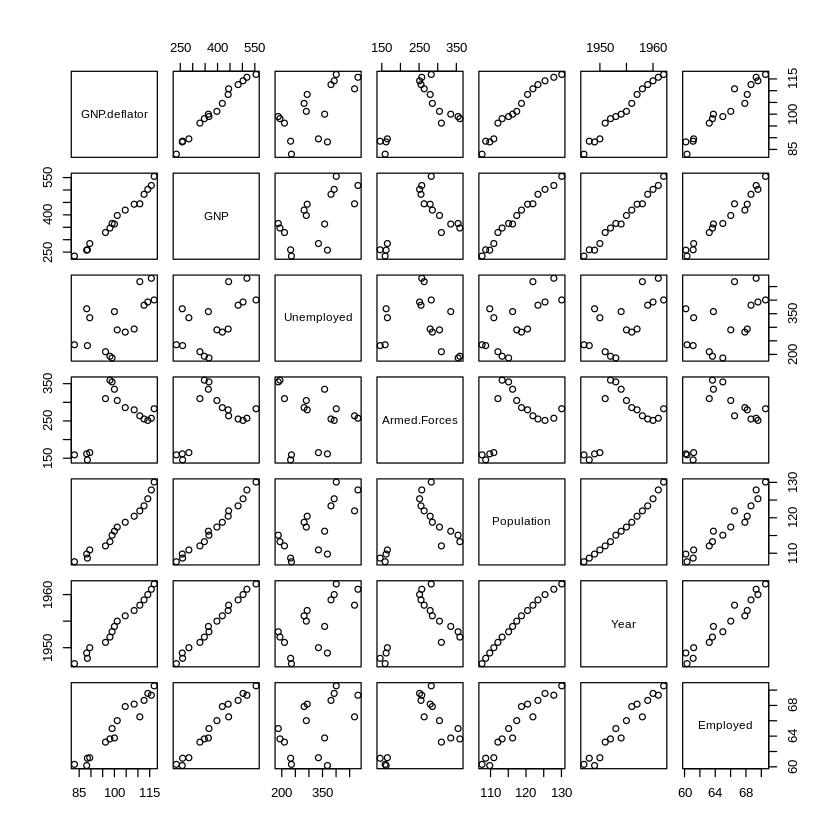

In [2]:
plot(longley)
####通过散点图观察，发现变量GNP.deflator、GNP、Population、Employed
####分别与year的函数图像趋势相近，可能隐含多重共线性。

In [25]:
longley_k <- longley[-1]
kappa(longley_k, exact=T)
cor_l <- cor(longley_k)
cor_l
###超过1000很多，多重共线性很严重
eigen(cor_l)

[1] 5965.272

,GNP,Unemployed,Armed.Forces,Population,Year,Employed
GNP,1.0000000,0.6042609,0.4464368,0.9910901,0.9952735,0.9835516
Unemployed,0.6042609,1.0000000,-0.1774206,0.6865515,0.6682566,0.5024981
Armed.Forces,0.4464368,-0.1774206,1.0000000,0.3644163,0.4172451,0.4573074
Population,0.9910901,0.6865515,0.3644163,1.0000000,0.9939528,0.9603906
Year,0.9952735,0.6682566,0.4172451,0.9939528,1.0000000,0.9713295
Employed,0.9835516,0.5024981,0.4573074,0.9603906,0.9713295,1.0000000


-0.4664796,-0.03972008,-0.16618553,-0.24680669,0.61518860,-0.56020613
-0.3120084,0.61091602,0.67318706,0.21941879,-0.06714833,-0.15361654
-0.2046347,-0.78171111,0.58065674,0.04847597,-0.07264863,-0.04756467
-0.4659838,0.05946171,-0.09445846,-0.66125937,-0.57233268,0.07464829
-0.4686311,0.01389938,-0.04098985,0.09058252,0.38779653,0.78735008
-0.4543304,-0.10199406,-0.41404919,0.66567468,-0.36579423,-0.18659083


In [29]:
###筛选变量
####上面特征值中，最后几个比较小，逐步观察kappa值
kappa(cor(longley_k[1:5]))
kappa(cor(longley_k[1:4]))
kappa(cor(longley_k[1:3]))
####结果发现变量取GNP	Unemployed	Armed.Forces的时候，kappa值小于100，已经没有什么多重共线性了


[1] 5562.731

[1] 1059.323

[1] 15.65753

In [34]:
longley_better <- longley[1:4]
lm.lb <-  lm(GNP.deflator~., data=longley_better)
summary(lm.lb)
####多元线性回归模型中， Unemployed和Armed.Forces的系数都没有通过t检验  


Call:
lm(formula = GNP.deflator ~ ., data = longley_better)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.28473 -0.67450 -0.08176  0.86362  1.99380 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  57.282926   2.070249  27.670 3.07e-12 ***
GNP           0.098196   0.006377  15.398 2.88e-09 ***
Unemployed    0.010128   0.006167   1.642    0.126    
Armed.Forces  0.011868   0.007374   1.609    0.133    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.385 on 12 degrees of freedom
Multiple R-squared:  0.9868,	Adjusted R-squared:  0.9835 
F-statistic: 299.5 on 3 and 12 DF,  p-value: 1.529e-11


In [35]:
step(lm.lb)
####step函数的结果：显示去掉这两个自变量，不能减小AIC

Start:  AIC=13.82
GNP.deflator ~ GNP + Unemployed + Armed.Forces

               Df Sum of Sq    RSS    AIC
<none>                       23.02 13.824
- Armed.Forces  1      4.97  28.00 14.951
- Unemployed    1      5.17  28.20 15.068
- GNP           1    454.94 477.96 60.351



Call:
lm(formula = GNP.deflator ~ GNP + Unemployed + Armed.Forces, 
    data = longley_better)

Coefficients:
 (Intercept)           GNP    Unemployed  Armed.Forces  
    57.28293       0.09820       0.01013       0.01187  


In [36]:
lm.lb2 <-  lm(GNP.deflator~GNP, data=longley_better)
summary(lm.lb2)
####该线性模型结果很好：系数t检验都是三颗星，R平方也有0.98非常接近1


Call:
lm(formula = GNP.deflator ~ GNP, data = longley_better)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7814 -0.6233  0.3123  0.7925  2.9986 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 59.941915   1.500214   39.96 7.89e-16 ***
GNP          0.107659   0.003756   28.67 7.81e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.446 on 14 degrees of freedom
Multiple R-squared:  0.9832,	Adjusted R-squared:  0.9821 
F-statistic: 821.8 on 1 and 14 DF,  p-value: 7.809e-14


In [38]:
##回归诊断
###变量的正态性
shapiro.test(longley_better$GNP)
shapiro.test(longley_better$GNP.deflator)
####GNP和GNP.deflator这两个变量都符合正态分布


	Shapiro-Wilk normality test

data:  longley_better$GNP
W = 0.96259, p-value = 0.709



	Shapiro-Wilk normality test

data:  longley_better$GNP.deflator
W = 0.94584, p-value = 0.4268


In [39]:
###残差的正态性
y.res <- residuals(lm.lb2)
shapiro.test(y.res)
####线性模型lm.lb2的残差符合正态分布


	Shapiro-Wilk normality test

data:  y.res
W = 0.93879, p-value = 0.3345


In [42]:
###残差的独立性
library(car)
durbinWatsonTest(lm.lb2)
####p-value>0.-5，通过独立性检验

 lag Autocorrelation D-W Statistic p-value
   1      0.04028489      1.494821     0.2
 Alternative hypothesis: rho != 0

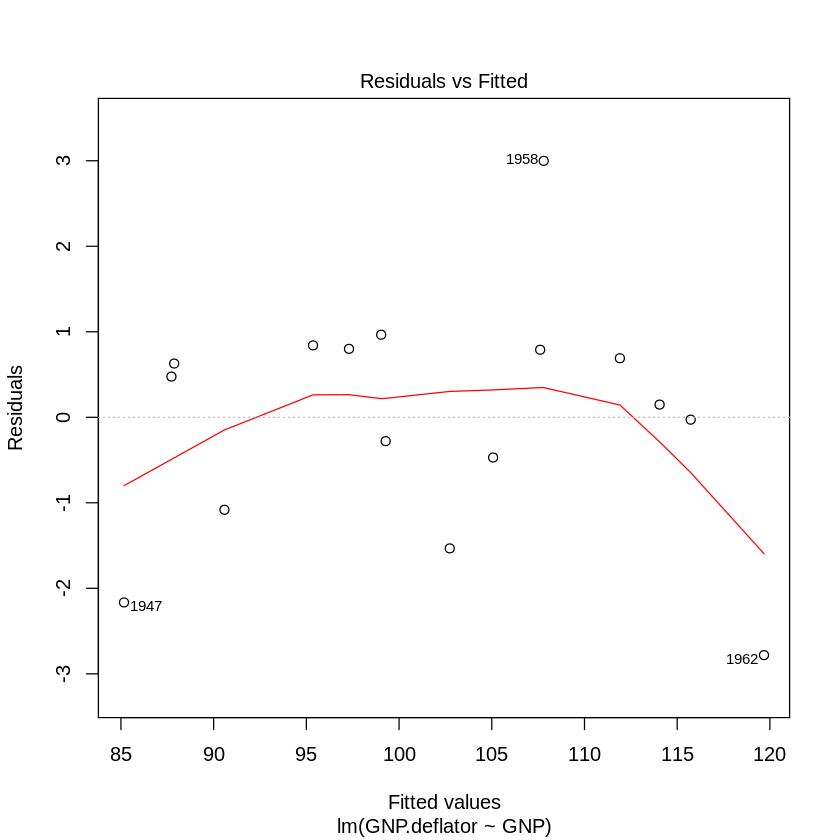

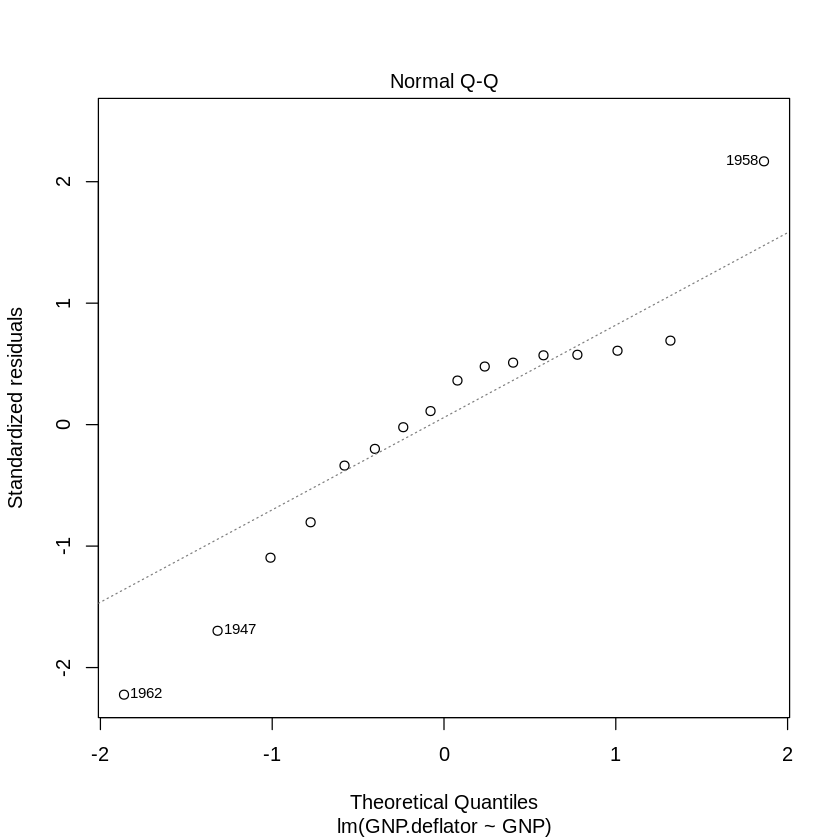

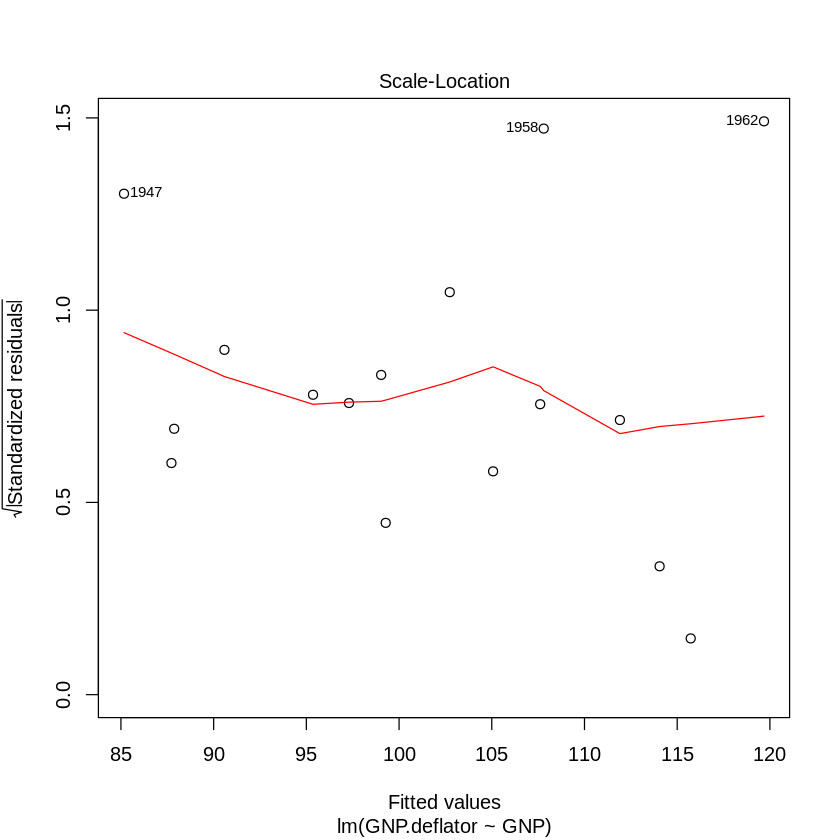

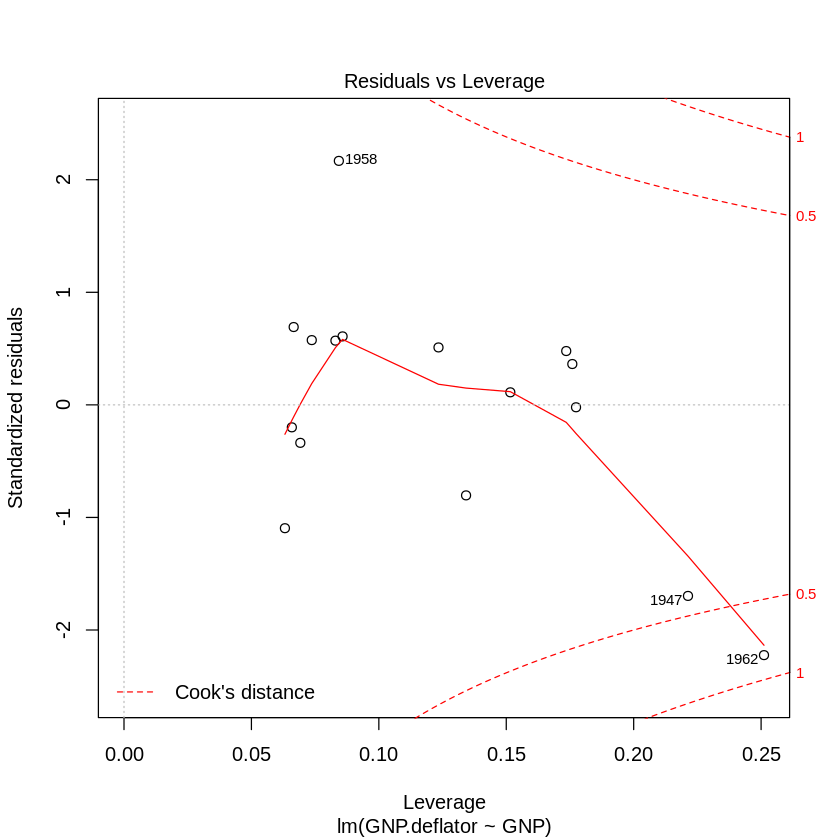

In [40]:
###观察模型的4个图
plot(lm.lb2)
# Rvs.F还算比较随机均匀分布在x轴附近
# S-L图也是比较均匀的分布在水平线附近
# QQ图里面1958仍然是高杠杆值，1947和1962偏离比较大
# leverage图 提示注意1947,1958,1962三个点


In [ ]:
## 结论：
   线性回归模型lm(formula = GNP.deflator ~ GNP, data = longley_better)符合正态分布，误差满足独立性，等方差，不存在多重共线性。
   回归系数通过t检验，R平方十分接近1。
综上所述，该线性模型合理。